# Question 1:

 - Importing Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

 - Reading the file using pandas and storing it as a dataframe

In [2]:
df = pd.read_csv('FRAFirm.csv')

- Taking a look at the column information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      38759 non-null  int64  
 1   Class     38759 non-null  int64  
 2   Start     38759 non-null  int64  
 3   End       38759 non-null  int64  
 4   Length    38759 non-null  int64  
 5   Night     38759 non-null  int64  
 6   Gap       38759 non-null  int64  
 7   WS        38759 non-null  int64  
 8   idx       38759 non-null  int64  
 9   Base      38759 non-null  float64
 10  StartAdj  38759 non-null  float64
 11  LenAdj    38759 non-null  float64
 12  Comp      38759 non-null  float64
 13  Trans     38759 non-null  float64
 14  Press     38759 non-null  float64
 15  p1s       38759 non-null  int64  
 16  p1l       38759 non-null  int64  
 17  p2s       38759 non-null  int64  
 18  p2l       38759 non-null  int64  
 19  MalAdj    38759 non-null  int64  
 20  NFZ       38759 non-null  in

- Taking a look at the first five entries and last five entries

In [4]:
df.head()

,FIRM,Class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,5.0,...,-4.0,-4.67,0,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,5.0,...,-4.0,-4.67,-10,320,0,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,5.0,...,0.0,0.00,-10,360,-10,320,0,0,0,0
3,4,0,920,1295,375,0,855,0,2,5.0,...,0.0,-0.67,5,465,-10,360,0,0,0,0
4,1,0,1280,1775,495,1,999,1,1,2.0,...,-1.0,0.00,4,375,5,465,0,0,0,0


In [5]:
df.tail()

,FIRM,Class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
38754,-2,0,855,1275,420,0,999,0,6,5.0,...,-3.0,-4.00,-3,490,-2,660,0,0,0,0
38755,-9,0,105,480,375,1,999,0,7,2.0,...,-5.0,-5.50,-2,420,-3,490,0,0,0,0
38756,-10,0,360,880,520,0,999,0,8,5.0,...,-6.0,-6.50,-9,375,-2,420,0,0,0,0
38757,-9,0,720,1275,555,0,999,0,9,5.0,...,-6.0,-7.83,-10,520,-9,375,0,0,0,0
38758,-10,1,1245,2035,790,1,999,0,10,2.0,...,-8.0,-9.83,-9,555,-10,520,0,0,0,0


- Finding how many duplicate entries there are

In [6]:
sum(df.duplicated())

1453

- Dropping duplicate entries inplace

In [7]:
df.drop_duplicates(inplace=True)

- Checking if the correct number of entries were dropped

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   Class     37306 non-null  int64  
 2   Start     37306 non-null  int64  
 3   End       37306 non-null  int64  
 4   Length    37306 non-null  int64  
 5   Night     37306 non-null  int64  
 6   Gap       37306 non-null  int64  
 7   WS        37306 non-null  int64  
 8   idx       37306 non-null  int64  
 9   Base      37306 non-null  float64
 10  StartAdj  37306 non-null  float64
 11  LenAdj    37306 non-null  float64
 12  Comp      37306 non-null  float64
 13  Trans     37306 non-null  float64
 14  Press     37306 non-null  float64
 15  p1s       37306 non-null  int64  
 16  p1l       37306 non-null  int64  
 17  p2s       37306 non-null  int64  
 18  p2l       37306 non-null  int64  
 19  MalAdj    37306 non-null  int64  
 20  NFZ       37306 non-null  in

# Logistic Regression for 3 Classes of Accidents (0,1,2)
- Assigning column 'Class' to y 

- Assigning all other columns to X

In [9]:
y = df.Class
X = df.iloc[:, df.columns != 'Class']

- Checking if X and y are assigned correctly

In [10]:
y.info()
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 37306 entries, 0 to 38758
Series name: Class
Non-Null Count  Dtype
--------------  -----
37306 non-null  int64
dtypes: int64(1)
memory usage: 582.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   Start     37306 non-null  int64  
 2   End       37306 non-null  int64  
 3   Length    37306 non-null  int64  
 4   Night     37306 non-null  int64  
 5   Gap       37306 non-null  int64  
 6   WS        37306 non-null  int64  
 7   idx       37306 non-null  int64  
 8   Base      37306 non-null  float64
 9   StartAdj  37306 non-null  float64
 10  LenAdj    37306 non-null  float64
 11  Comp      37306 non-null  float64
 12  Trans     37306 non-null  float64
 13  Press     37306 non-null  float64
 14  p1s       37306 non-null  int64  
 15  p1l       37306 non-null

- Double checking if data has accidents labeled

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
y.tail()

38754    0
38755    0
38756    0
38757    0
38758    1
Name: Class, dtype: int64

- Splitting the data to the data into different sets
- Test data will be 20% of data
- Train data will be 80% of data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

- Scaling the X_train and X_test data to avoid warning messages later

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

- Building and training the model

- Printing out the accuracy for the sets

In [15]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.48%
The accuracy for the test set is 94.48%


# Analysis 
- Checking out the predicted probabilities 
- Based on the predicted probabilites, it looks as if the model will almost never predict a class 2 type accident
- I want to confirm my suspicions by making a confusion matrix

In [16]:
prob = model.predict_proba(X_test_scaled[:50])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.9891, 0.0069, 0.0041],
       [0.9925, 0.0046, 0.0029],
       [0.9321, 0.0442, 0.0237],
       [0.9848, 0.0088, 0.0064],
       [0.9396, 0.0442, 0.0161],
       [0.8806, 0.0919, 0.0275],
       [0.9897, 0.0062, 0.0042],
       [0.9563, 0.0318, 0.0119],
       [0.9932, 0.0049, 0.0019],
       [0.987 , 0.0078, 0.0052],
       [0.0001, 0.8642, 0.1357],
       [0.984 , 0.0091, 0.0069],
       [0.9496, 0.0398, 0.0107],
       [0.9691, 0.0221, 0.0088],
       [0.9829, 0.0126, 0.0045],
       [0.9836, 0.0098, 0.0066],
       [0.989 , 0.0083, 0.0027],
       [0.    , 0.8795, 0.1205],
       [0.9856, 0.0092, 0.0052],
       [0.9154, 0.0603, 0.0243],
       [0.9864, 0.0092, 0.0044],
       [0.9636, 0.0256, 0.0108],
       [0.993 , 0.0045, 0.0025],
       [0.8702, 0.102 , 0.0278],
       [0.9811, 0.0117, 0.0071],
       [0.9587, 0.0275, 0.0138],
       [0.9869, 0.0102, 0.0029],
       [0.9413, 0.0385, 0.0202],
       [0.9831, 0.011 , 0.006 ],
       [0.9866, 0.0089, 0.0044],
       [0.

- I am having the model predict y based on our X_test_sclaed
    - y_pred is what the model predicts
- I am making a confusion matrix based off of the y_pred and y_test
- The model never predicts a class '2' type accident based on the confusion matrix

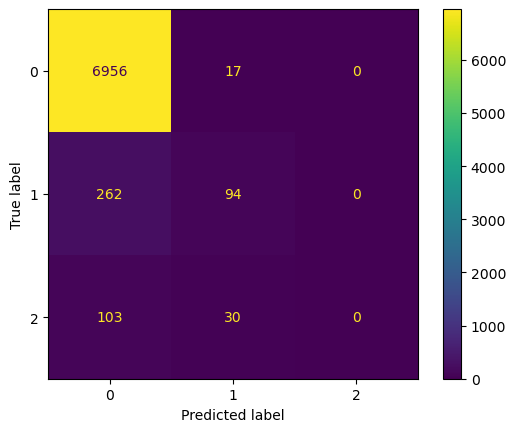

In [17]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Logistic Regression for Two Classes of Accidents (0,1)

- Changing the 'Class' column values
- If the value in class is equal to 2 
- Change the the value to 1 
- 0 is no accident 
- 1 is accident

In [18]:
df.loc[df['Class'] == 2, 'Class'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   Class     37306 non-null  int64  
 2   Start     37306 non-null  int64  
 3   End       37306 non-null  int64  
 4   Length    37306 non-null  int64  
 5   Night     37306 non-null  int64  
 6   Gap       37306 non-null  int64  
 7   WS        37306 non-null  int64  
 8   idx       37306 non-null  int64  
 9   Base      37306 non-null  float64
 10  StartAdj  37306 non-null  float64
 11  LenAdj    37306 non-null  float64
 12  Comp      37306 non-null  float64
 13  Trans     37306 non-null  float64
 14  Press     37306 non-null  float64
 15  p1s       37306 non-null  int64  
 16  p1l       37306 non-null  int64  
 17  p2s       37306 non-null  int64  
 18  p2l       37306 non-null  int64  
 19  MalAdj    37306 non-null  int64  
 20  NFZ       37306 non-null  in

- Assigning column 'Class' to y 

- Assigning all other columns to X

In [19]:
y = df.Class
X = df.iloc[:, df.columns != 'Class']

- Splitting the data to the data into different sets
- Test data will be 20% of data
- Train data will be 80% of data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

- Scaling the X_train and X_test data to avoid warning messages later

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

- Building and training the model

- Printing out the accuracy for the sets

In [22]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.89%
The accuracy for the test set is 95.08%


In [23]:
prob = model.predict_proba(X_test_scaled[:50])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.9877, 0.0123],
       [0.9497, 0.0503],
       [0.9906, 0.0094],
       [0.9844, 0.0156],
       [0.9829, 0.0171],
       [0.926 , 0.074 ],
       [0.9701, 0.0299],
       [0.9478, 0.0522],
       [0.9536, 0.0464],
       [0.9758, 0.0242],
       [0.9127, 0.0873],
       [0.9933, 0.0067],
       [0.9668, 0.0332],
       [0.9882, 0.0118],
       [0.9697, 0.0303],
       [0.9909, 0.0091],
       [0.9871, 0.0129],
       [0.9523, 0.0477],
       [0.9722, 0.0278],
       [0.9901, 0.0099],
       [0.9639, 0.0361],
       [0.9968, 0.0032],
       [0.924 , 0.076 ],
       [0.9571, 0.0429],
       [0.9787, 0.0213],
       [0.9947, 0.0053],
       [0.9346, 0.0654],
       [0.3981, 0.6019],
       [0.9673, 0.0327],
       [0.9918, 0.0082],
       [0.9173, 0.0827],
       [0.9717, 0.0283],
       [0.9877, 0.0123],
       [0.9942, 0.0058],
       [0.9757, 0.0243],
       [0.9421, 0.0579],
       [0.9781, 0.0219],
       [0.99  , 0.01  ],
       [0.9702, 0.0298],
       [0.9944, 0.0056],


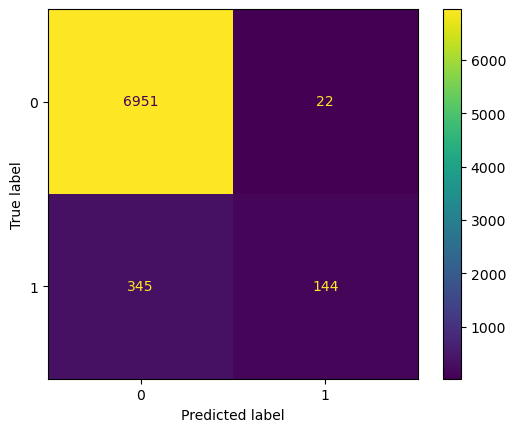

In [24]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Question 1 Answered:

The two types of accidents are indistinguishable. There is no reiable way to tell them apart. I came to this conclusion because I tried to train my model to determine which group the sample belongs in (0,1,2). However, this model never predicted that samples belonged in group 2, when there were actually samples that belonged in group 2. This claim is backed up by the confusion matrix I made for y_pred and y_test data. The confusion matrix also shows group 1 was predicted when it was actually group 2 in some cases (both are accidents). Overall, I believe it is better if the regressor only categorizes the data in two groups: no accident or accident because the model I trained can't properly predict samples belonging to group 2. 


When I trained the model to predict either accident or no accident(0,1), the model was slightly more accurate than the previous model that predicted between (0,1,2). The confusion matrix from the model for (0,1) was also more accurate compared to the other model (0,1). Therefore, I believe the two types of accidents are indistinguishable. It is either accident or no accident

# Question 2:
 - Answering based of Logistic Regression(0,1)
     - No accident or accident

- Checking the accuracy for the training set and the test set

In [25]:
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.89%
The accuracy for the test set is 95.08%


- Checking some of the prediction values

In [26]:
prob = model.predict_proba(X_test_scaled[:20])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.9877, 0.0123],
       [0.9497, 0.0503],
       [0.9906, 0.0094],
       [0.9844, 0.0156],
       [0.9829, 0.0171],
       [0.926 , 0.074 ],
       [0.9701, 0.0299],
       [0.9478, 0.0522],
       [0.9536, 0.0464],
       [0.9758, 0.0242],
       [0.9127, 0.0873],
       [0.9933, 0.0067],
       [0.9668, 0.0332],
       [0.9882, 0.0118],
       [0.9697, 0.0303],
       [0.9909, 0.0091],
       [0.9871, 0.0129],
       [0.9523, 0.0477],
       [0.9722, 0.0278],
       [0.9901, 0.0099]])

- Displaying a confusion matrix

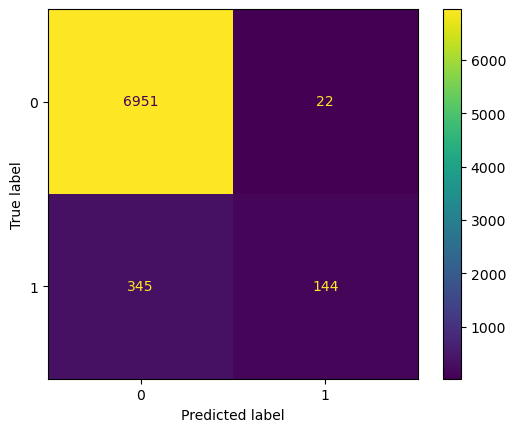

In [27]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Question 2 Answered:

The regressor classifies the samples rather accurately. The accuracy for the training set was 94.89% and the accuracy for the test set was 95.08%. Both of these numbers show high accuracy. Furthermore, the confusion matrix shows that our regressor was picking the right choice the majority of the time. The confusion matrix shows that it is very accurate at classiying samples into class 0. However, it mistakenly classifies the sample as 0 when it is actually 1 many times. Overall, the regressor is very accurate. 

# Question 3:

- Creating a heatmap to see how variables correlate with each other
- My plan is to drop variables with correlation over absolute value of 0.5

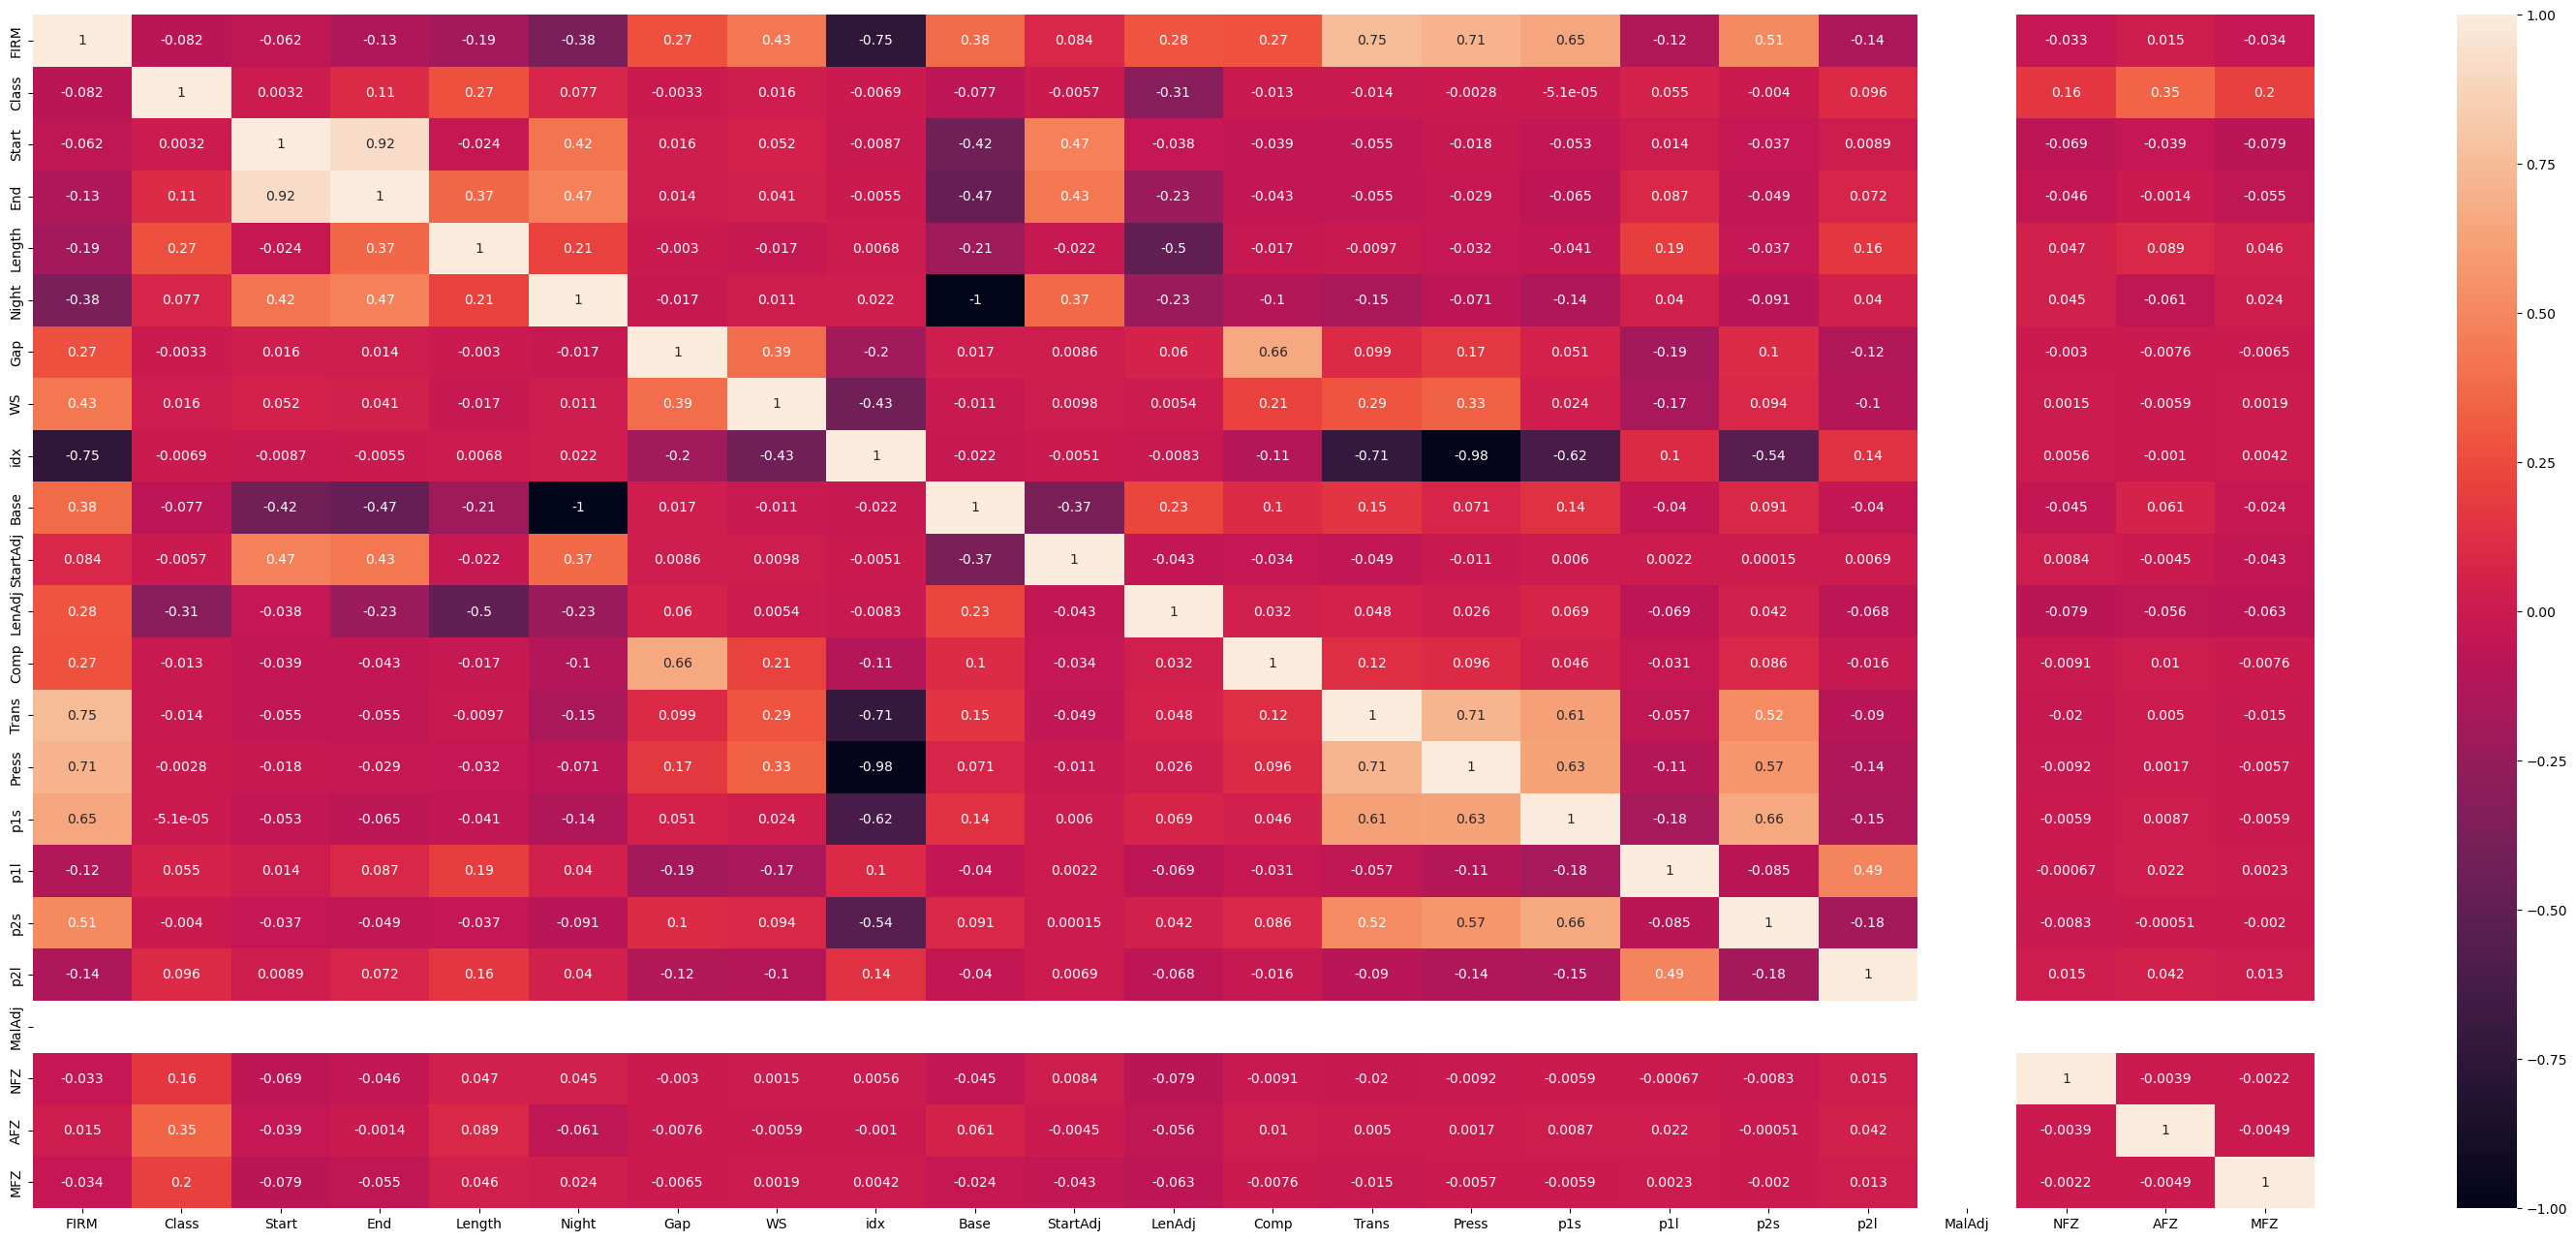

In [28]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

- Testing to see which columns can/should be ignored when doing the regression
- Testing to see which columns are necessary

In [29]:
df.drop('MalAdj', axis = 1, inplace=True)
df.drop('idx', axis = 1, inplace=True)
df.drop('Base', axis = 1, inplace=True)
#df.drop('LenAdj', axis = 1, inplace=True)
#df.drop('p2s', axis = 1, inplace=True)
#df.drop('p1s', axis = 1, inplace=True)

- Creating a new heatmap to see what it looks like after we drop our values

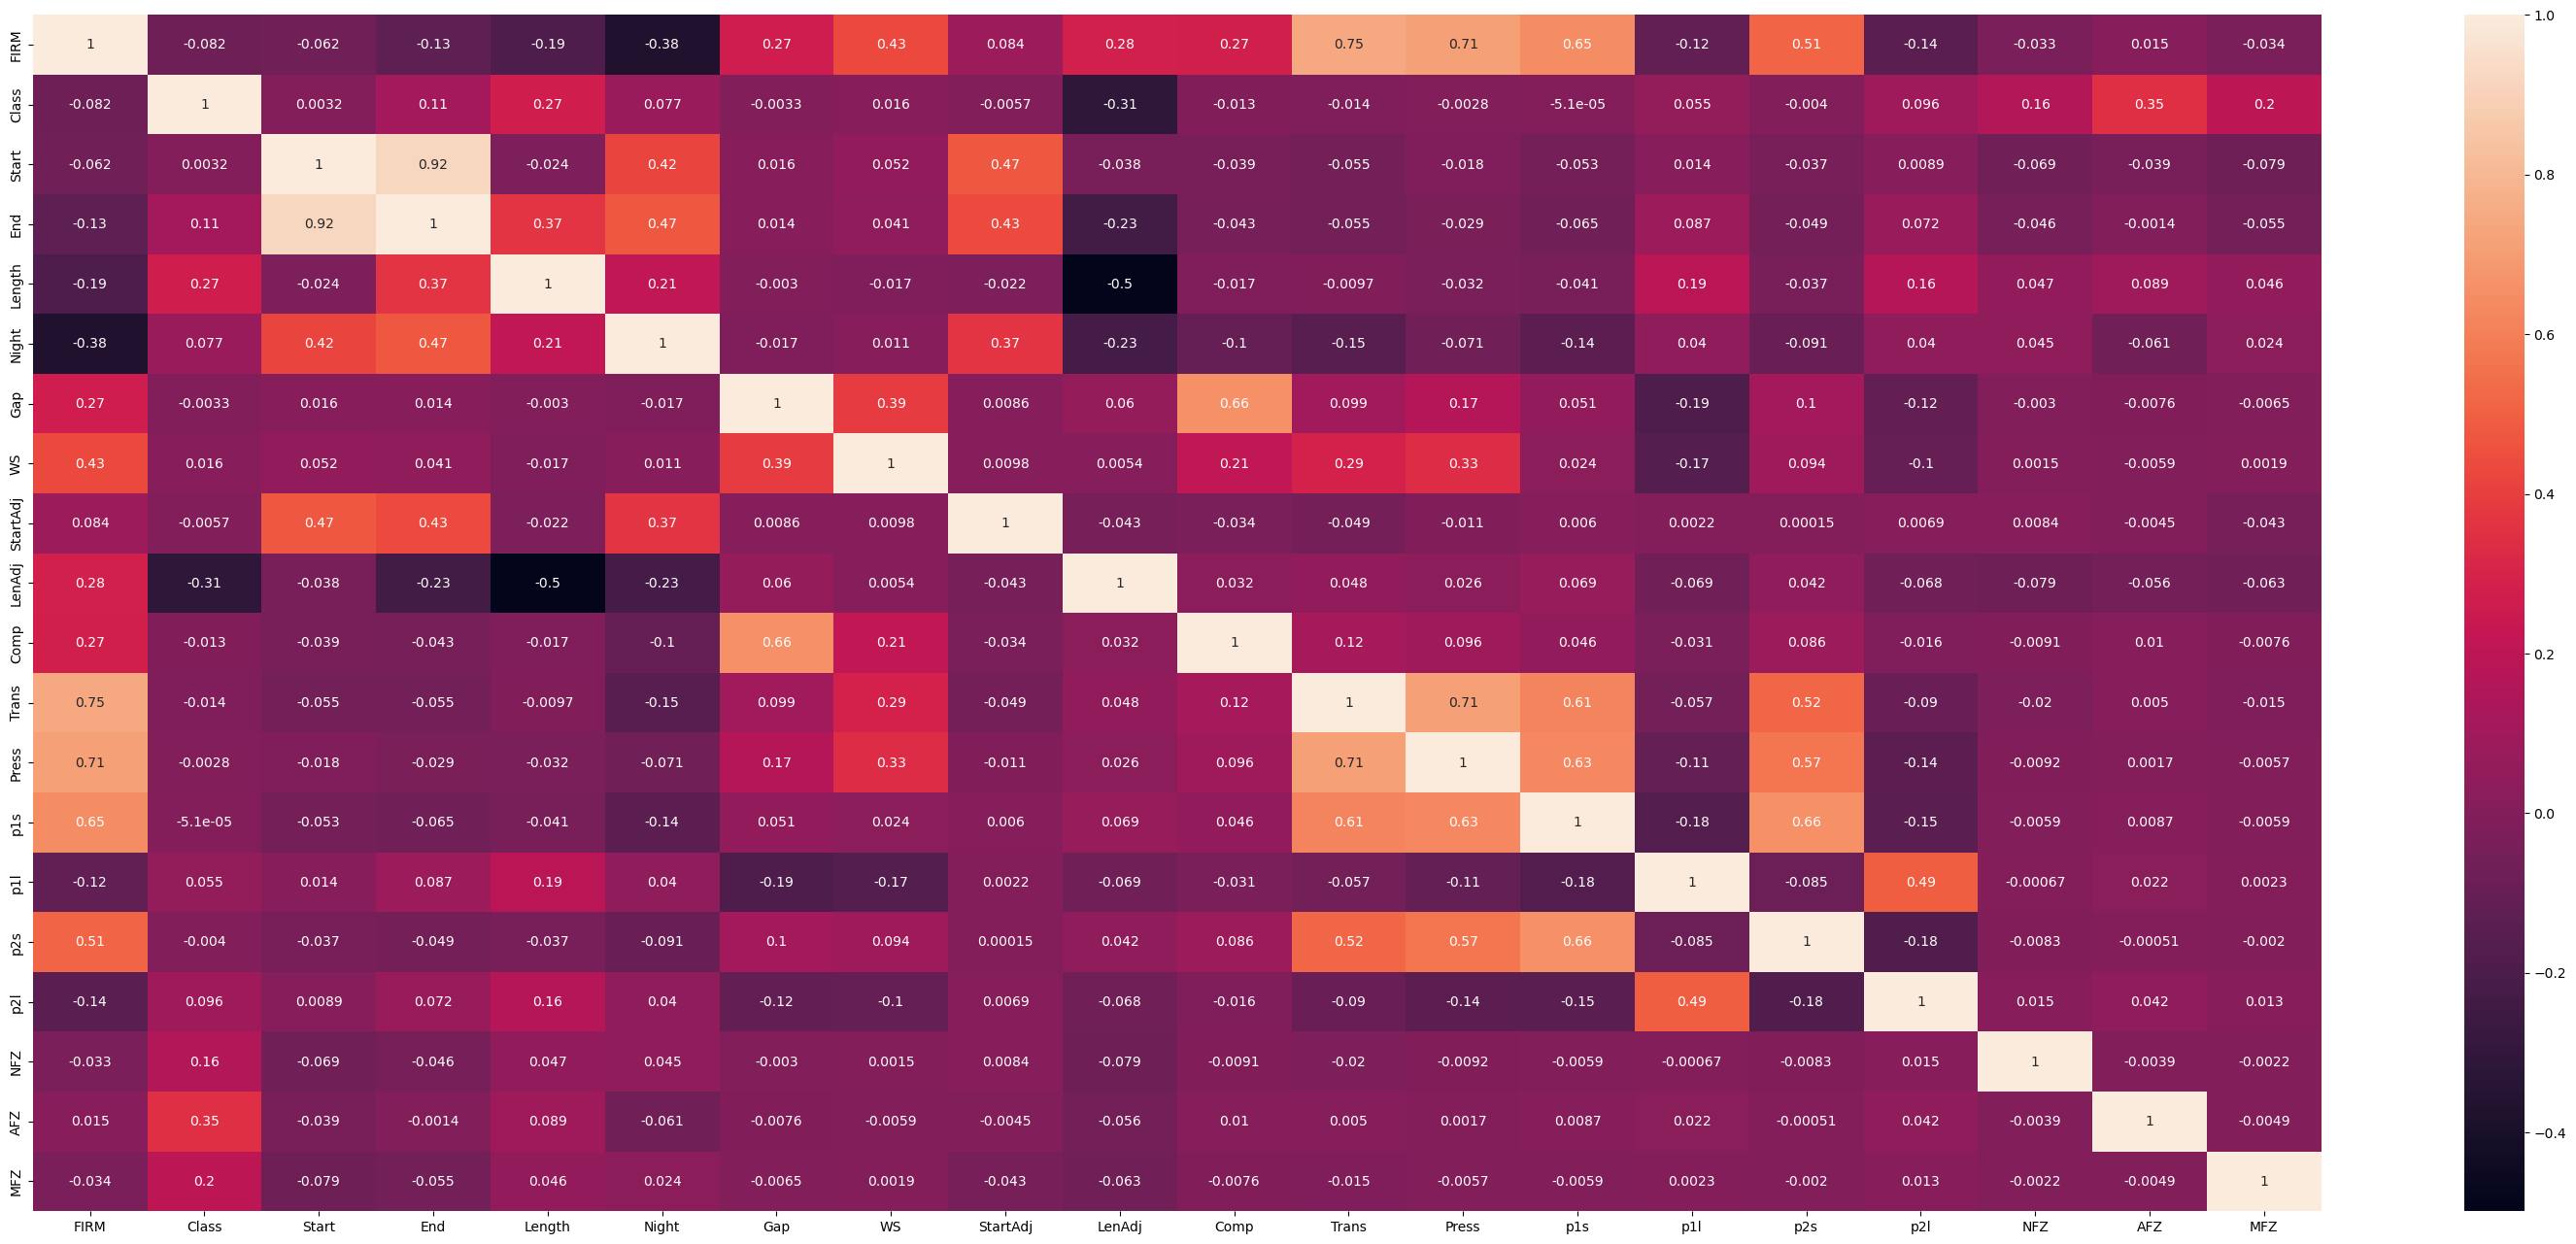

In [30]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

- Assigning column 'Class' to y 

- Assigning all other columns to X

In [31]:
y = df.Class
X = df.iloc[:, df.columns != 'Class']

- Splitting the data to the data into different sets
- Test data will be 20% of data
- Train data will be 80% of data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

- Scaling the X_train and X_test data to avoid warning messages later

In [33]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

- Building and training the model

- Printing out the accuracy for the sets

In [34]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.89%
The accuracy for the test set is 95.10%


# Question 3 Answered:
All of the columns are significant in preforming the classification expect for 'MalAdj', 'idx', and 'Base'. These three columns should and can be ignored. After I dropped these variables, I trained the model again without these columns. With the new model, the accuracy for the training set stayed the same and the accuracy for the test set improved slightly, when compared to the model with all of the columns. 

# Extra Credit: 

- Restarting since I modified the dataframe earlier and dropped some columns
- Going to redo the logisitc regression like question 1 except I will drop column 'FIRM'
    - Logistic Regression(0,1)
    - No accident or accident
    - Dropping column 'FIRM'
- Reading in data frame

In [35]:
df = pd.read_csv('FRAFirm.csv')

- Get the sum of duplicated values

In [36]:
sum(df.duplicated())

1453

- Drop the duplicate values in place

In [37]:
df.drop_duplicates(inplace=True)

- Change class 2 accidents to class 1 accident
    - 0 is no accident
    - 1 is accident

In [38]:
df.loc[df['Class'] == 2, 'Class'] = 1

- Dropping the column 'FIRM' in place

In [39]:
df.drop('FIRM', axis = 1, inplace=True)

- Assigning column 'Class' to y 

- Assigning all other columns to X

In [40]:
y = df.Class
X = df.iloc[:, df.columns != 'Class']

- Splitting the data to the data into different sets
- Test data will be 20% of data
- Train data will be 80% of data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

- Scaling the X_train and X_test data to avoid warning messages later

In [42]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

- Checking the accuracy for the training set and the test set

In [43]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.89%
The accuracy for the test set is 95.11%


- Displaying confusion matrix

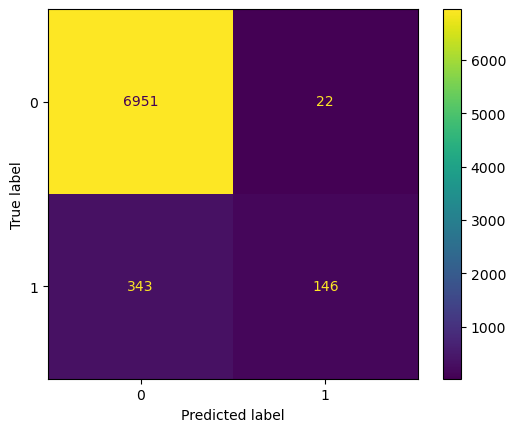

In [44]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

- Displaying heat map

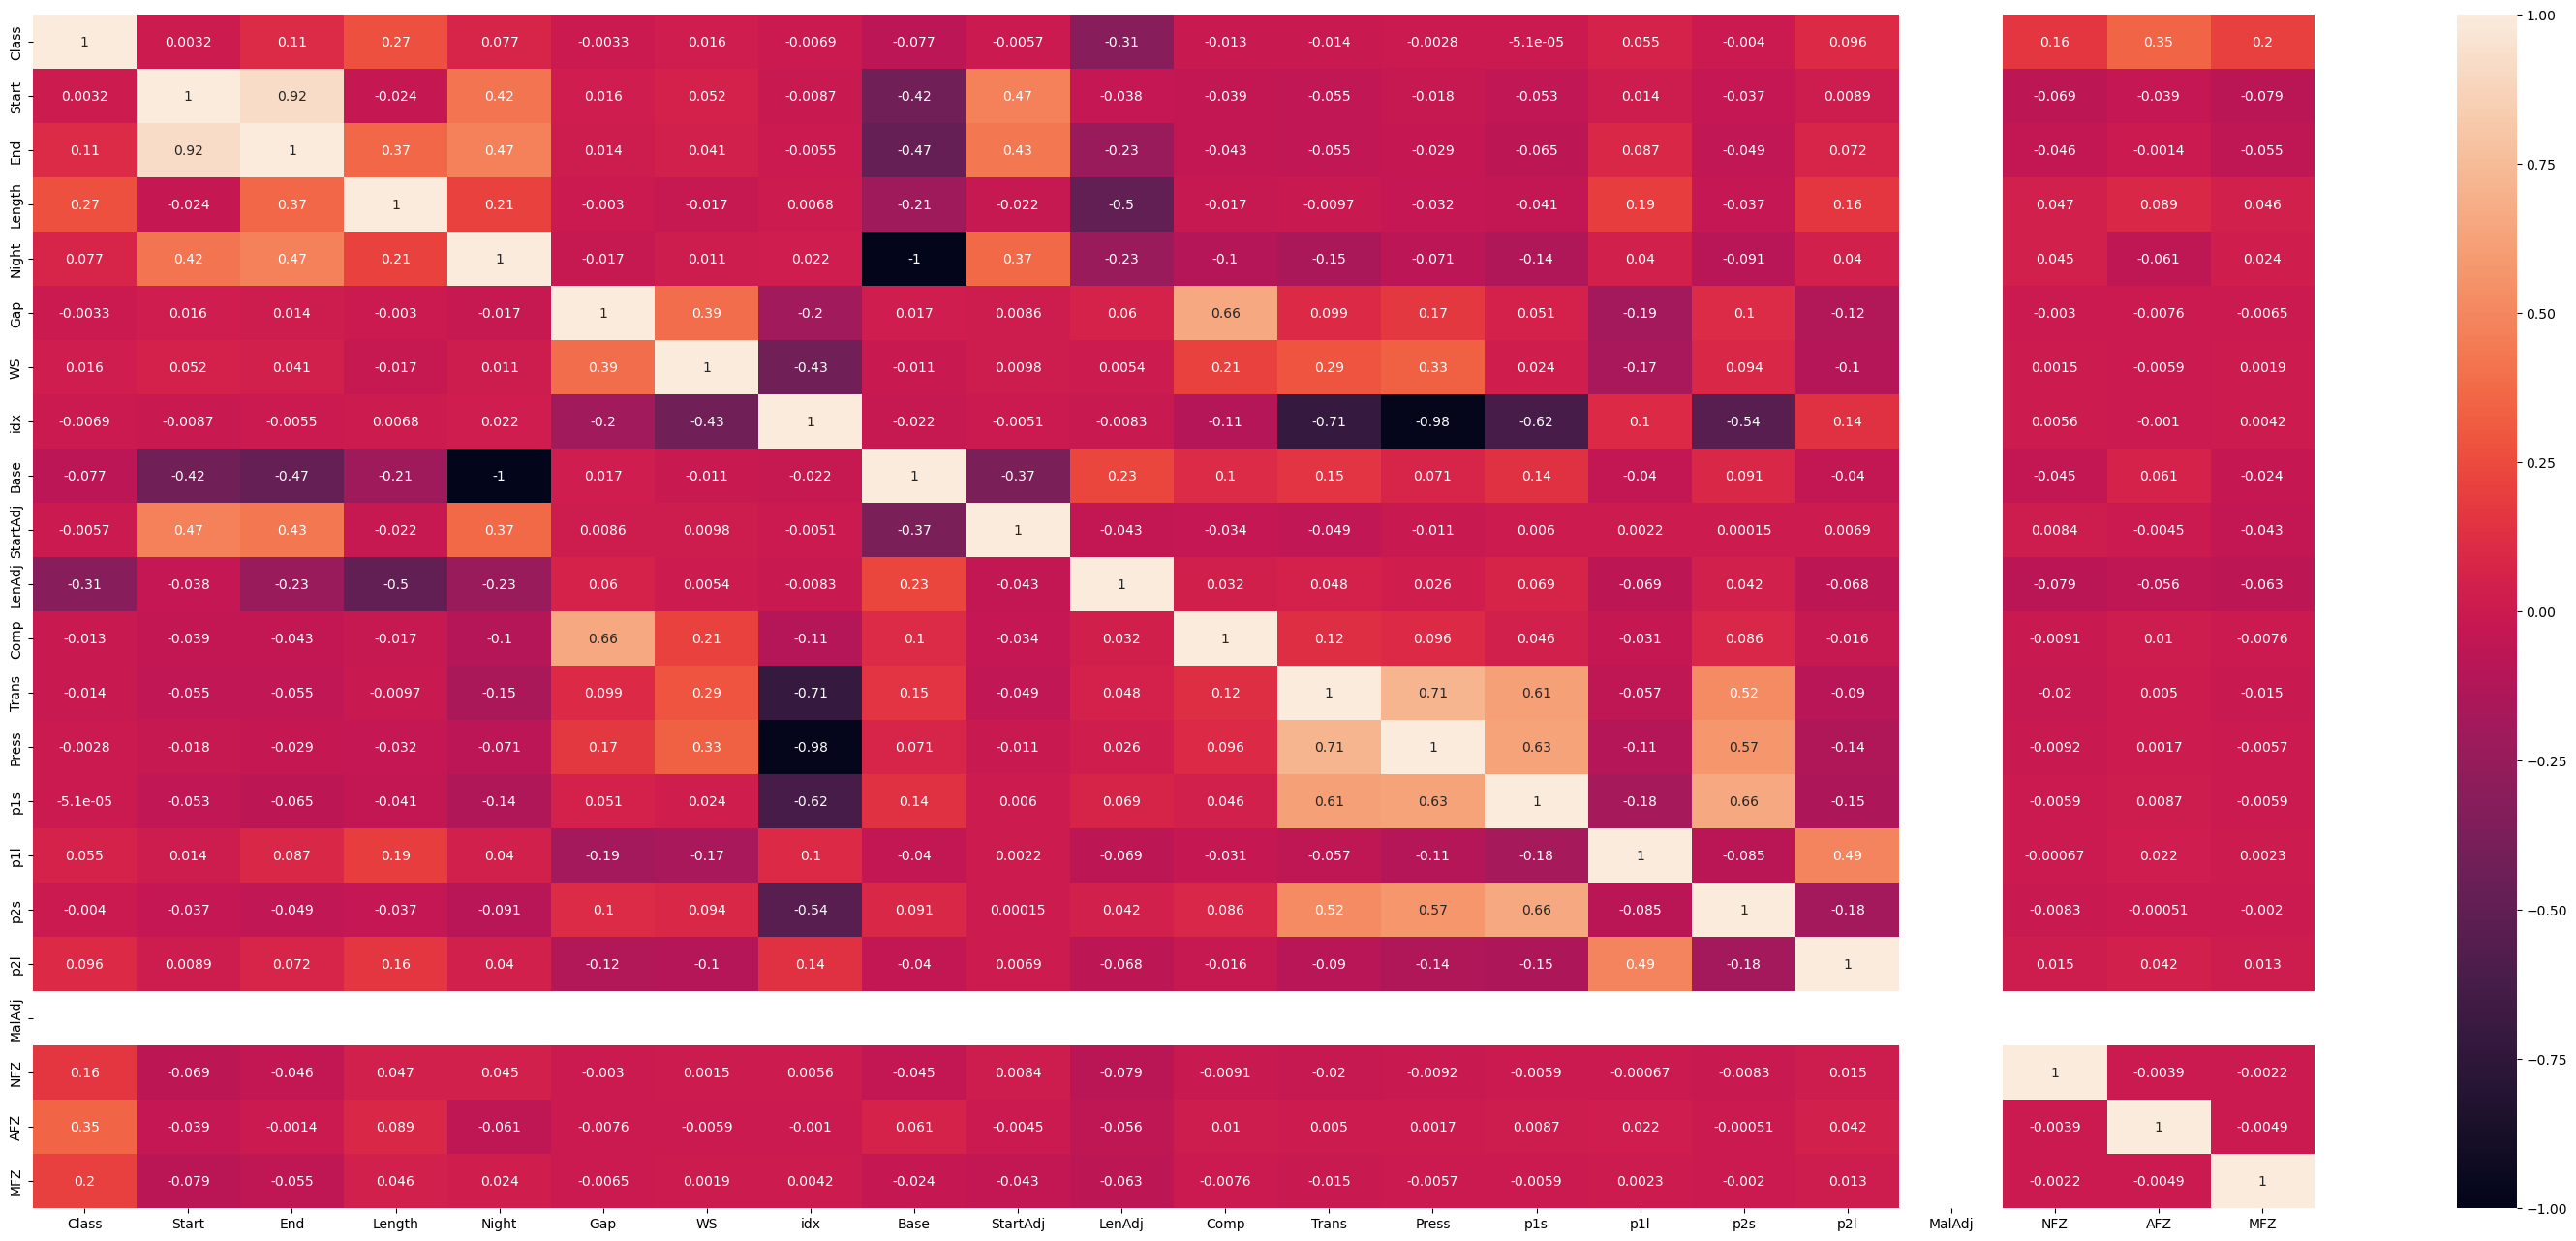

In [45]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Extra Credit Answered:
## Model from Question 1 Logistic Regression (0,1) Accuracy
- The accuracy for the training set is 94.89%
- The accuracy for the test set is 95.08%
## Model Extra Credit Logistic Regression (0,1) Accuracy (Drop 'FIRM')
- The accuracy for the training set is 94.89%
- The accuracy for the test set is 95.11%
## Answer
The accuracy for the training sets when dropping FIRM remained the same across the two models. The accuracy for the test set slightly improved when dropping firm, but only by .03%. When comparing the confusion matrix of the two models. It shows that the model of without 'FIRM' predicted two more correct accidents when compared with the model with 'FIRM'. Overall, I would say that dropping 'FIRM' improves the accuracy of the results slightly but it is almost insiginificant. Furthermore, dropping 'FIRM' increases the significance of other features specifically the ones that are highly correlated with 'FIRM'. We rely on this data more since 'FIRM' is dropped. This is further backed up with our heat map. 